Dataset Preview:
   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     

Column Data Types:
 day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

Checking for non-numeric values in columns...
Column 'day' co

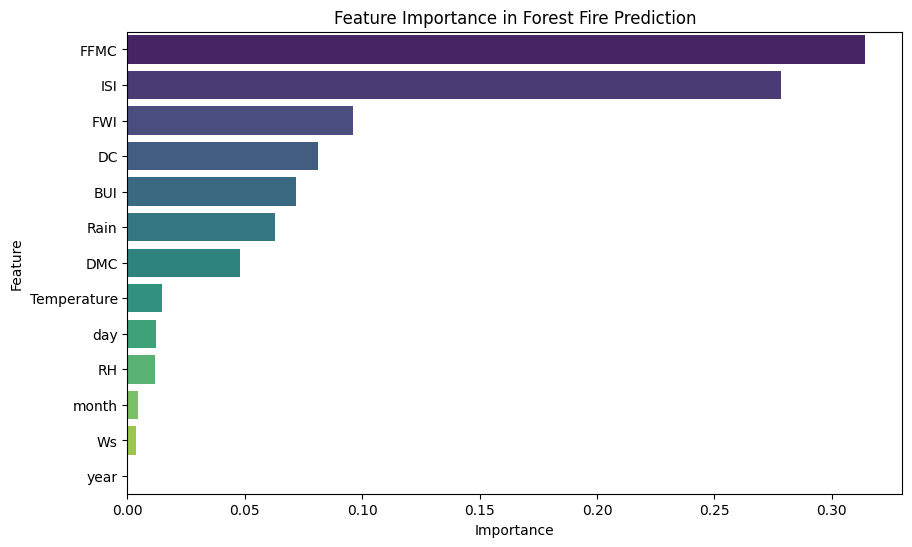

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset (replace 'Algerian_forest_fires_dataset.csv' with your actual file)
# Ensure your dataset has a target variable (e.g., "Classes") for forest fire prediction
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

# Inspect the first few rows of the dataset
print("Dataset Preview:\n", df.head())

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Display the column data types
print("\nColumn Data Types:\n", df.dtypes)

#Day, Month, Year, Temperature, RH (Relative Humidity), WS (Wind Speed), Rain, FFMC (Fine Fuel Moisture Code), DMC (Duff Moisture Code), DC (Drought Code), ISI (Initial Spread Index), BUI (Build-Up Index), FWI (Fire Weather Index)

# Function to check for non-numeric values in the dataset
def check_for_non_numeric(df, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    print("\nChecking for non-numeric values in columns...")
    for col in df.columns:
        if col not in exclude_columns:  # Skip the excluded columns
            try:
                pd.to_numeric(df[col], errors='raise')  # Attempt conversion to numeric
            except ValueError:
                print(f"Column '{col}' contains non-numeric values.")

# Specify columns to exclude from the check (e.g., 'Classes')
exclude_columns = ['Classes']

# Run the function to check for non-numeric values
check_for_non_numeric(df, exclude_columns)

# Convert all columns to numeric, except for the 'Classes' column
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != 'Classes' else x)

# Display the updated column data types
print("\nUpdated Column Data Types:\n", df.dtypes)

# Check for NaN values after conversion
print("\nNaN Values in Each Column:\n", df.isna().sum())

# Fill or drop NaN values in numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))  # Fill NaN with column mean

# Re-check for NaN values
print("\nNaN Values After Filling in Numeric Columns:\n", df.isna().sum())

# Ensure all non-numeric columns, like 'Classes', are handled separately
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("\nNon-numeric Columns:", non_numeric_cols)

# Convert any categorical columns, like 'Classes', if necessary
df['Classes'] = df['Classes'].str.strip()  # Remove extra spaces, if any
df['Classes'] = df['Classes'].astype(str)  # Ensure 'Classes' is a string or categorical


# Define the feature variables (X) and the target variable (y)
X = df.drop('Classes', axis=1)  # Feature columns
y = df['Classes']               # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (important for many models, including Random Forest)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first few rows of the training data
print("\nStandardized Training Data (First 5 Rows):\n", X_train[:5])  # Standardized features
print("\nTraining Labels (First 5 Rows):\n", y_train.head())  # Target labels

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance visualization
feature_importance = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by importance and plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis',
    hue='Feature',  # Assign the 'Feature' column to hue
    dodge=False  # Ensure no overlapping for hue
)
plt.title('Feature Importance in Forest Fire Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()



In [ ]:
# Example new test data (replace these values with your own test cases)
new_test_data = pd.DataFrame({
    'day': [15],
    'month': [6],
    'year': [2012],
    'Temperature': [28],
    'RH': [80],
    'Ws': [17],
    'Rain': [3.1],
    'FFMC': [49.4],
    'DMC': [3],
    'DC': [7.4],
    'ISI': [0.4],
    'BUI': [3],
    'FWI': [0.1]
})

# Preprocess the new test data
new_test_data = scaler.transform(new_test_data)  # Standardize using the previously fitted scaler

# Predict using the trained model
predictions = rf_model.predict(new_test_data)

# Output predictions
print("Predictions for the new test cases:", predictions)


Predictions for the new test cases: ['not fire']


In [ ]:
# Example new test data (replace these values with your own test cases)
new_test_data = pd.DataFrame({
    'day': [12],
    'month': [6],
    'year': [2012],
    'Temperature': [26],
    'RH': [81],
    'Ws': [19],
    'Rain': [0],
    'FFMC': [84],
    'DMC': [13.8],
    'DC': [61.4],
    'ISI': [4.8],
    'BUI': [17.7],
    'FWI': [7.1]
})

# Preprocess the new test data
new_test_data = scaler.transform(new_test_data)  # Standardize using the previously fitted scaler

# Predict using the trained model
predictions = rf_model.predict(new_test_data)

# Output predictions
print("Predictions for the new test cases:", predictions)

Predictions for the new test cases: ['fire']
